In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from scipy.stats import norm
import pandas as pd
import scipy.stats as stats
import random
import pylab
from scipy.stats import binom
from scipy.stats import beta
import matplotlib.pyplot as plt
import os

#read in the data file
#call data to show table
data = pd.read_csv("simple_RheaData.csv")
data = data.drop(columns = ['Sadness', 'BigSad', 'Pain', 'What even'])
#Diameter and depth are those aspects of crater. d/D is depth/diameter. CWS is Crater Wall Slope

       Min  1st Quart    Median    Mean  3rd Quart        Max
0  4.29279   7.639864  9.019208  9.3413  10.587942  18.085382


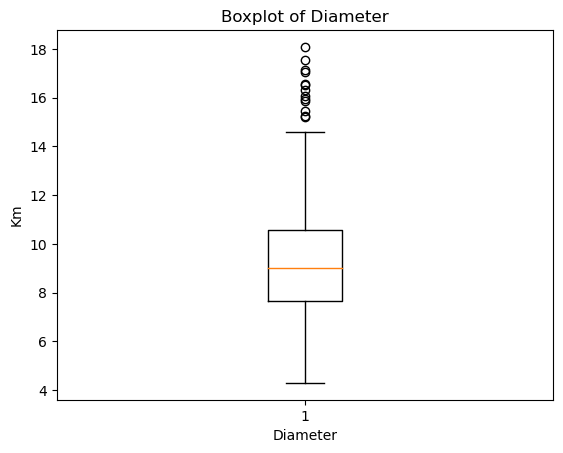

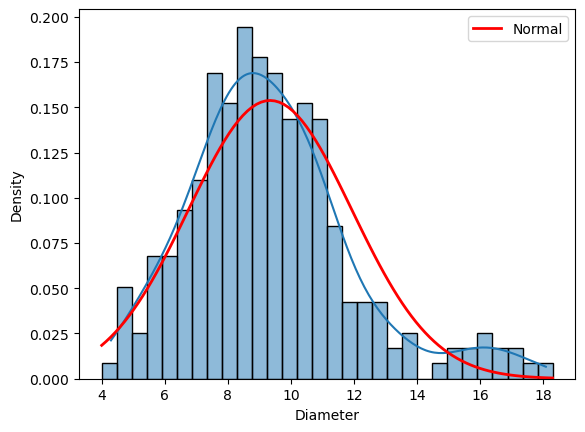

In [3]:
stats_dict = {"Min":np.min(data.Diameter),"1st Quart":np.quantile(data.Diameter,0.25),"Median":np.median(data.Diameter),"Mean":np.mean(data.Diameter),"3rd Quart":np.quantile(data.Diameter,0.75),"Max":np.max(data.Diameter)}
data_table = pd.DataFrame(data=stats_dict, index=[0])
print(data_table)

#boxplot of diameter
plt.boxplot(data.Diameter)
plt.title("Boxplot of Diameter")
plt.xlabel("Diameter")
plt.ylabel("Km")
plt.show()

#Histogram with kde (blue) and normal distribution (red)
ax = sns.histplot(data.Diameter,bins=30,binrange=[4,18.3],kde=True,stat="density")
x_pdf = np.linspace(4, 18.3, 100)
y_pdf = stats.norm.pdf(x_pdf,stats_dict["Mean"],np.sqrt(np.var(data.Diameter)))
ax.plot(x_pdf, y_pdf, 'r', lw=2, label='Normal')
ax.legend()
plt.show(ax)


In [7]:
#simple to complex crater range is from 4.5 to 15 km which likely accounts for double peak at around 16km
#(1) craters with highly disrupted rims
#(e.g., rims superposed by at least one other crater, such as
#doublet craters), (2) craters partially out of our image range,
#and (3) ambiguous crater morphologies.
#what is difference between sample and parameter space in our case
#every measured crater
diameter is represented by a Gaussian distribution with a mean
value of D and a standard deviation given as 0.25D.

SyntaxError: invalid syntax (Temp/ipykernel_18872/2378857237.py, line 8)

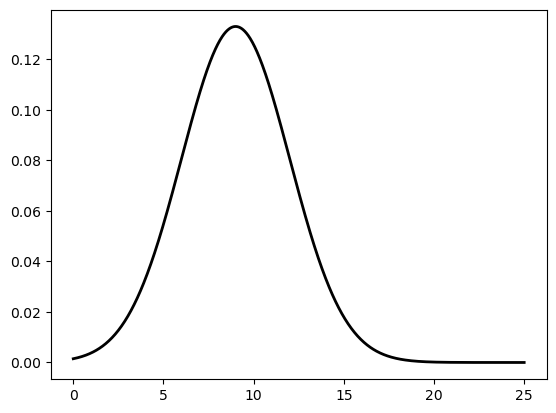

In [7]:
#Prior
x = np.linspace(0,25,1000)
a = 9 #prior mean, middle of our data range, not robust
b = 3 #prior variance, not robust
theta = stats.norm.pdf(x,a,b)
prior = plt.plot(x, theta, 'black', lw=2, label='Normal')
plt.show(prior)

In [8]:
#Likelihood (distributed only with theta as mean and v as variance)
xbar = stats_dict["Mean"]
v = 0.25*xbar
print("Variance: "+str(v))
n = 248
print("Number of Observations: "+str(n))


Variance: 2.335324990923387
Number of Observations: 248


In [9]:
#Posterior
mu_p = 1./(n/v+1/b)*(n*xbar/v)
var_p = 1./(n/v+1/b)

print('Posterior Mean = ',mu_p)
print('Posterior Variance =',var_p)

Posterior Mean =  9.312070513441826
Posterior Variance = 0.009387167856292162


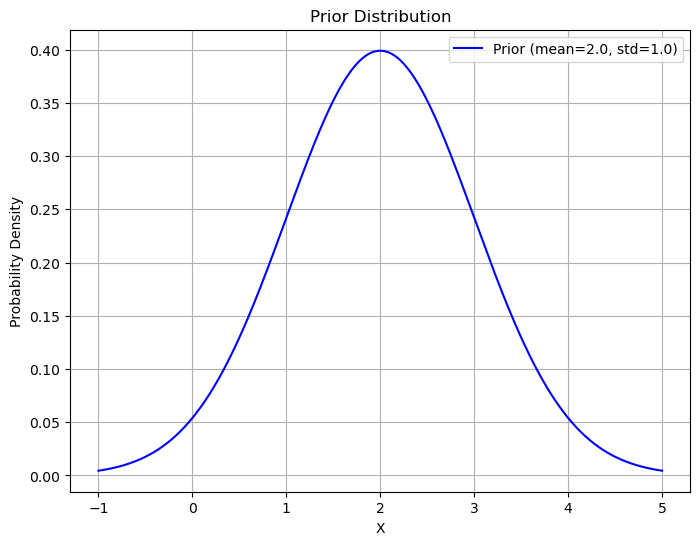

In [4]:
# Plot the prior
a = 2.0  # Mean of the prior
b = 1.0  # Standard deviation of the prior

# Generate the data to plot
x = np.linspace(a - 3 * b, a + 3 * b, 1000)

# Calc PDF
pdf = norm.pdf(x, loc=a, scale=b)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Prior (mean={a}, std={b})', color='blue')
plt.title('Prior Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prior predictive check is to do what I just did above but with different a and b values to see if the shape matches the data any better

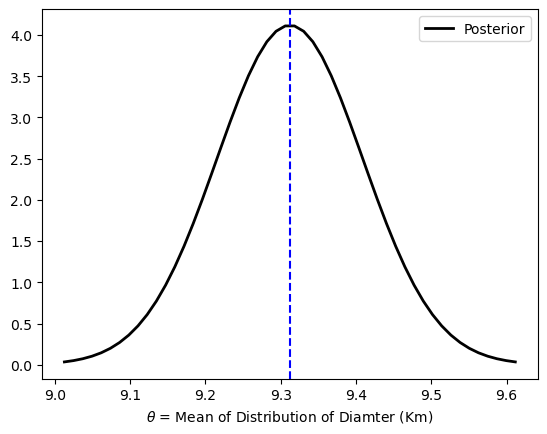

In [12]:
# Plot the posterior and run the posterior predictive check
xx = np.linspace(norm.ppf(0.001,loc=mu_p,scale=np.sqrt(var_p)),norm.ppf(0.999,loc=mu_p,scale=np.sqrt(var_p)))
plt.plot(xx, norm.pdf(xx,loc=mu_p,scale=np.sqrt(var_p)), 'k-', lw=2, label='Posterior')
plt.xlabel(r"$\theta}$ = Mean of Distribution of Diameter (Km)")
plt.legend()
plt.axvline(mu_p, color = "b", ls = "--")

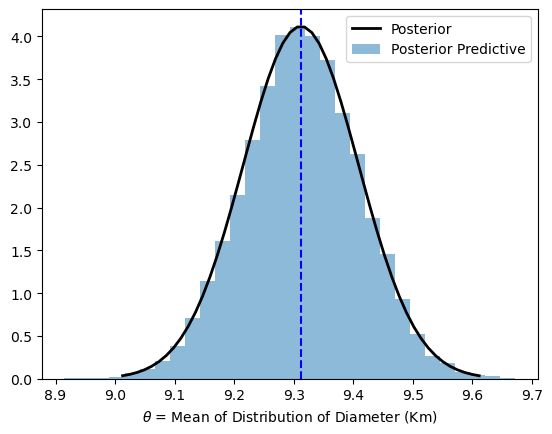

Mean of Posterior Predictive Check: 9.313295744926569


In [14]:
# Posterior predictive check
# Simulate data points from the posterior distribution
posterior_samples = np.random.normal(loc=mu_p, scale=np.sqrt(var_p), size=10000)

# Plot the posterior
xx = np.linspace(norm.ppf(0.001, loc=mu_p, scale=np.sqrt(var_p)), norm.ppf(0.999, loc=mu_p, scale=np.sqrt(var_p)))
plt.plot(xx, norm.pdf(xx, loc=mu_p, scale=np.sqrt(var_p)), 'k-', lw=2, label='Posterior')

# Plot the posterior predictive check
plt.hist(posterior_samples, bins=30, density=True, alpha=0.5, label='Posterior Predictive')

# Customize plot labels and legend
plt.xlabel(r"$\theta$ = Mean of Distribution of Diameter (Km)")
plt.legend()
plt.axvline(mu_p, color="b", ls="--")

plt.show()

mean_pred = np.mean(posterior_samples)
print("Mean of Posterior Predictive Check: "+str(mean_pred))